## Посмотрим на другой способ получения MSE

1.Подготовка

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection
import sklearn.preprocessing as sk_preprocessing
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def Search_Optimal_degree(X, y,Max_degree,cv):
    result=[]
    MSE=[]
    l=[]
    for degree in range(1,Max_degree+1):
        l=[]
        polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=degree )
        X_transformed = polynomial_transformer.fit_transform(X)
        lin = LinearRegression()
        l .append(( cross_val_score(lin,X_transformed,y,scoring = 'neg_mean_squared_error',cv = cv)).mean())
        l.append(degree)
        result.append(l)
  
    
    return result
        
            
    

2.Посмотрим на данные.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/programmer1sss/ML/main/Data/advertising.csv")




In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

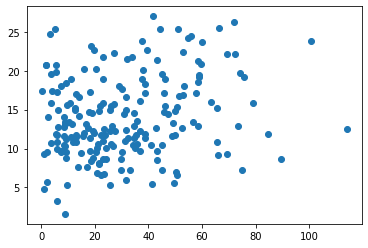

In [5]:
X = df[["newspaper"]]
y = df[["sales"]]

plt.scatter(X, y)


 3.Обучим модель.

In [6]:
Max_degree=100
cv=10
result=Search_Optimal_degree(X, y,Max_degree,cv)

4.Переведем для удобство в DataFrame

In [7]:

columns=[ 'MSE','degree']
df_result = pd.DataFrame(result, columns=columns)


5.Найдем оптимальную степень

In [8]:
df_result.iloc[df_result['MSE'].argmax()] # Находим минимальный MSE_train и возврашаем MSE_train и степень

MSE      -26.043755
degree     3.000000
Name: 2, dtype: float64

6.Немного визуализации

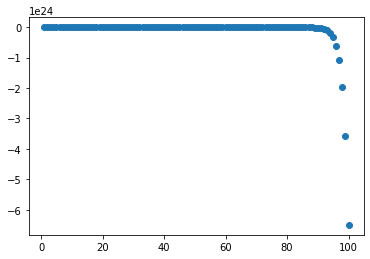

In [9]:
plt.scatter(df_result[['degree']],df_result[['MSE']])

    7. Вывод: В данном случае оптимальная степень полинома значения "3". Также можно наблюдать по визуализации полученого результата  резкое возрастания MSE при степени близкой к "90" 